# 🎧 Spotify Dataset Dimensionality

## 📚 Dependencies

* Requirements and imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

from scipy.stats import mode
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
from sklearn.metrics import f1_score, classification_report, normalized_mutual_info_score

# 📥 Read

* data_train from `data/train_names.csv`
* data_test from `data/test_names.csv`

In [2]:
file_path_train = 'data/train_names.csv'
file_path_test = 'data/test_names.csv'

data_train = pd.read_csv(file_path_train)
data_test = pd.read_csv(file_path_test)

In [3]:
data_train_id = data_train["Id"]
data_train_genre = data_train["genre"]
data_train.drop(columns=['Id', 'genre', 'name'], inplace=True)
data_train

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,1.674407,-0.386858,-1.199254,-0.290517,1,1.858977,-0.491604,-0.781833,-0.716185,1.331101,1.771964,-0.976989,0.101856
1,-1.306331,1.085168,-0.925526,0.242681,1,-0.039754,-0.548504,-0.350418,2.353411,-0.996688,-0.402563,-0.337419,0.101856
2,0.325366,-0.381426,-1.472982,0.331377,0,1.493531,2.219102,-0.781833,-0.258891,1.262257,1.097010,0.144722,-3.558382
3,-1.248515,0.699508,0.443117,1.248927,0,-0.778590,-0.457590,1.388559,-0.173892,-1.378342,1.148449,0.628992,0.101856
4,-1.666075,0.618031,-0.378069,1.309417,0,-0.270144,-0.360738,-0.781833,-0.508221,-0.454541,2.283504,-0.305223,0.101856
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29498,-1.614683,-0.517222,-1.472982,-0.536217,0,3.026815,-0.201624,-0.781833,0.653432,1.567752,1.683382,-0.868145,0.101856
29499,1.411022,-0.957200,0.169388,-0.199102,1,0.254192,0.593370,-0.781833,0.217104,1.701138,-0.397448,-1.621298,0.101856
29500,-1.100763,0.411621,0.716845,-0.072684,1,-0.753962,-0.558760,1.231438,-0.836317,-0.880513,1.106023,0.921449,0.101856
29501,0.306094,-0.935473,-1.472982,0.543433,1,1.779532,0.679845,-0.781833,-0.451555,-1.357689,2.614861,-1.307627,0.101856


In [4]:
data_test_id = data_test["Id"]
data_test.drop(columns=['Id', 'name'], inplace=True)
data_test

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,1.398126,0.166869,-0.899123,0.810025,1,0.034484,-0.193519,-0.747626,0.499750,1.769319,2.457652,0.272106,0.110517
1,1.208027,-0.765033,-1.170325,-0.266377,1,0.488884,1.119416,-0.746615,-0.667775,-0.023409,1.857263,-0.996632,0.110517
2,-1.123857,0.393111,-0.627922,1.015306,0,0.042456,0.950193,-0.747626,-0.700639,0.693682,-0.743949,-0.548661,0.110517
3,0.333571,1.201119,-1.170325,0.538193,1,-0.603272,-0.567420,0.650640,2.206355,1.726120,-0.869498,-0.444684,0.110517
4,0.295551,0.199189,0.185684,0.586202,0,-0.816920,-0.496370,-0.747415,-0.589940,2.050107,-0.575629,-0.547626,3.821183
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8456,-0.040291,1.093384,-1.441527,0.039558,1,-0.736403,-0.571015,1.274817,1.312694,-1.181123,-0.114278,1.981178,0.110517
8457,-0.122668,0.856369,-1.170325,1.223236,1,-0.555440,-0.550638,-0.068936,-0.697179,-1.107686,0.093714,-0.532318,0.110517
8458,-0.388807,0.689380,0.999290,0.618650,0,-0.838444,-0.546203,1.282994,-0.584174,1.851395,-0.493103,-0.089660,0.110517
8459,-0.959104,-1.734642,-1.441527,-1.609976,1,2.035440,3.756958,-0.747626,-0.705251,0.054348,1.484177,-0.178793,0.110517


# 🔧 Functions

### Correlation

In [5]:
def correlation(dataset, threshold):
    """
    Devuelve una lista de pares de columnas que tienen una correlación superior al umbral especificado.
    
    Args:
        dataset (pd.DataFrame): El conjunto de datos (DataFrame).
        threshold (float): El umbral de correlación mínima (en valor absoluto).
    
    Returns:
        list: Lista de tuplas con los pares de columnas correlacionadas.
    """
    # Calcular la matriz de correlación
    corr_matrix = dataset.corr()
    
    # Inicializar una lista para almacenar los pares de columnas correlacionadas
    col_corr = []
    
    # Iterar sobre la matriz de correlación
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:  # Verificar si la correlación es mayor que el umbral
                col_corr.append((corr_matrix.columns[i], corr_matrix.columns[j], float(abs(corr_matrix.iloc[i, j]))))  # Añadir el par a la lista
    
    return col_corr


### Get Optimal PCA Components

In [6]:
def optimal_pca_components(data, threshold=0.95):
    """
    Determine the optimal number of PCA components based on explained variance threshold.
    
    Parameters:
        data (np.ndarray): Normalized dataset.
        threshold (float): Cumulative variance threshold (default 0.95).
    
    Returns:
        int: Optimal number of components.
        np.ndarray: Explained variance ratio.
    """
    pca = PCA()
    pca.fit(data)
    cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
    optimal_components = np.argmax(cumulative_variance >= threshold) + 1
    
    # Create DataFrame for plotting
    plot_data = {
        "Number of Components": range(1, len(cumulative_variance) + 1),
        "Cumulative Explained Variance": cumulative_variance
    }
    
    # Plot with Plotly Express
    fig = px.line(
        plot_data,
        x="Number of Components",
        y="Cumulative Explained Variance",
        markers=True,
        title="Cumulative Explained Variance vs Number of Components",
        labels={"Cumulative Explained Variance": "Cumulative Explained Variance", "Number of Components": "Components"}
    )
    fig.add_hline(y=threshold, line_dash="dash", annotation_text=f"{threshold * 100}% Variance", line_color="red")
    fig.add_vline(x=optimal_components - 1, line_dash="dash", annotation_text=f"{optimal_components} Components", line_color="green")
    fig.show()
    
    return optimal_components, pca.explained_variance_ratio_


### Plot Reconstruction Error

In [7]:
def plot_reconstruction_error(data, max_components=13):
    """
    Plot reconstruction error for PCA using Plotly Express.
    
    Parameters:
        data (np.ndarray): Normalized dataset.
        max_components (int): Maximum number of PCA components to test.
    """
    # Calculate reconstruction errors
    errors = []
    for n in range(1, max_components + 1):
        pca = PCA(n_components=n)
        reduced_data = pca.fit_transform(data)
        reconstructed_data = pca.inverse_transform(reduced_data)
        error = np.mean((data - reconstructed_data) ** 2)
        errors.append(error)
    
    # Create DataFrame for plotting
    plot_data = {
        "Number of Components": range(1, max_components + 1),
        "Reconstruction Error": errors
    }
    
    # Plot with Plotly Express
    fig = px.line(
        plot_data,
        x="Number of Components",
        y="Reconstruction Error",
        markers=True,
        title="Reconstruction Error vs Number of Components",
        labels={"Reconstruction Error": "Reconstruction Error", "Number of Components": "Components"}
    )
    fig.show()
    
    return errors


### Perform PCA

In [8]:
def perform_pca(data, n_components=None, explained_variance_threshold=None):
    """
    Perform PCA on the dataset and reduce dimensionality.
    
    Parameters:
        data (pd.DataFrame): Input dataset with numeric columns only.
        n_components (int): Number of principal components to retain. Default is None.
        explained_variance_threshold (float): Minimum cumulative variance to retain. Default is None.
    
    Returns:
        transformed_data (pd.DataFrame): Transformed dataset in reduced dimensions.
        pca (PCA): Fitted PCA object for further analysis.
    """
        
    # Initialize PCA
    if explained_variance_threshold:
        pca = PCA(n_components=explained_variance_threshold)
    else:
        pca = PCA(n_components=n_components)
    
    # Fit PCA and transform data
    principal_components = pca.fit_transform(data)
    
    # Create a DataFrame with principal components
    col_names = [f"PC{i+1}" for i in range(principal_components.shape[1])]
    transformed_data = pd.DataFrame(principal_components, columns=col_names)
    
    return transformed_data, pca


### Plot PCA 3d

In [9]:
def plot_pca_3d(data, color_column=None):
    """
    Plot a 3D scatter plot of the first three principal components with color grouping.
    
    Parameters:
        data (pd.DataFrame): DataFrame with at least three principal components (columns named "PC1", "PC2", "PC3").
        color_column (str): Column name in `data` to use for color differentiation. Default is None.
    """
    global colors
    
    if color_column is not None:
        # Convert the color column to a string to ensure categorical treatment
        data[color_column] = data[color_column].astype(str)
    
    fig = px.scatter_3d(
        data,
        x="PC1",
        y="PC2",
        z="PC3",
        color=color_column,
        color_discrete_map={str(i): colors[i] for i in range(len(colors))},  # Map colors
        title="PCA: First Three Components",
        labels={"PC1": "Principal Component 1", "PC2": "Principal Component 2", "PC3": "Principal Component 3"},
        opacity=0.6,
        height=900
    )
    fig.update_traces(marker=dict(size=5))
    fig.show()


### Get LDA Dataframe

In [10]:
def get_lda_df(data, target_column, n_components=3):
    """
    Apply LDA to the data and plot the first three components with color grouping based on the target variable.
    
    Parameters:
        data (pd.DataFrame or np.ndarray): Normalized data (after PCA or raw features).
        target_column (str): The target column in `data` used for class separation (e.g., 'Id', 'Genre').
        n_components (int): Number of dimensions for LDA output (default 3 for 3D).
    """
    # Separate features and target
    X = data.drop(columns=[target_column])
    y = data[target_column]
    
    # Initialize and fit LDA
    lda = LinearDiscriminantAnalysis(n_components=n_components)
    lda_result = lda.fit_transform(X, y)
    
    # Create a DataFrame for the LDA results
    lda_df = pd.DataFrame(lda_result, columns=[f"LDA{i+1}" for i in range(n_components)])
    
    # Add the target column for color differentiation
    lda_df[target_column] = y.reset_index(drop=True)
    
    return lda_df


### Apply K-Means to LDA

In [11]:
def apply_kmeans_to_lda(lda_data, n_clusters=3, n_components=3):
    """
    Apply K-Means clustering to the LDA-transformed data and plot the results in 3D.
    
    Parameters:
        lda_data (pd.DataFrame): The LDA-transformed data.
        n_clusters (int): The number of clusters for K-Means.
        n_components (int): Number of dimensions for LDA (default 3 for 3D).
    
    Returns:
        lda_data (pd.DataFrame): The original LDA data with added KMeans cluster labels.
    """
    global colors
    
    # Apply K-Means clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    lda_data['Cluster'] = kmeans.fit_predict(lda_data.iloc[:, :-1])  # Assuming the last column is the target

    # Plot the K-Means results in 3D
    fig = px.scatter_3d(
        lda_data,
        x="LDA1",
        y="LDA2",
        z="LDA3",
        color="Cluster",  # Color by K-Means clusters
        color_discrete_map = colors,
        title="K-Means Clustering on LDA Data (3D)",
        labels={"LDA1": "LDA Component 1", "LDA2": "LDA Component 2", "LDA3": "LDA Component 3"},
        opacity=0.6,
        height=900
    )
    fig.show()
    
    return lda_data


# Feature Selection

### Variance Threshold

Check for characteristics with low variance.
- None found

In [12]:
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
sel.fit(data_train)
features = sum(sel.get_support())
print(f'{features} out of {data_train.shape[1]} selected features')

13 out of 13 selected features


### Correlation

Check for correlated characteristics.
- 3 pairs > 50% correlation
  - `('loudness', 'energy')`
  - `('acousticness', 'energy')`
  - `('duration_ms', 'instrumentalness')`

In [13]:
corr_features = correlation(data_train, 0.5)
corr_features

[('loudness', 'energy', 0.5975342003591609),
 ('acousticness', 'energy', 0.5008265057125387),
 ('duration_ms', 'instrumentalness', 0.6014429811589732)]

### Wrapper

Find the characteristics subset that results in the best accuracy.
- `('danceability', 'loudness', 'tempo', 'duration_ms')`

In [14]:
X = data_train
y = data_train_genre

# Crear un clasificador KNN
knn = KNeighborsClassifier(n_neighbors=15)

# Implementar un EFS con sólo 4 características máxima en este problema de clasificación

# Convertir las características en un DataFrame para tener nombres de columnas
# X_df = pd.DataFrame(X, columns=data_train.feature_names)

# Configurar el Exhaustive Feature Selector
efs = EFS(knn, 
        min_features=1,        # Número mínimo de características
        max_features=4,        # Número máximo de características
        scoring='accuracy',    # Métrica de evaluación
        cv=5,                  # Validación cruzada con 5 pliegues
        n_jobs=-1,             # Usar todos los núcleos disponibles
        print_progress=True
        )             # Mostrar progreso

# Ajustar EFS al conjunto de datos
efs.fit(X, y)

# Mostrar los resultados
print('Best accuracy score: %.2f' % efs.best_score_)
print('Best subset (indices):', efs.best_idx_)
print('Best subset (corresponding names):', efs.best_feature_names_)


Features: 1092/1092

Best accuracy score: 0.57
Best subset (indices): (0, 3, 10, 11)
Best subset (corresponding names): ('danceability', 'loudness', 'tempo', 'duration_ms')


## Random Forest

In [15]:
X = data_train
y = data_train_genre

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# Inicializar y entrenar el modelo de Random Forest para regresión
rf_regressor = RandomForestClassifier(n_estimators=100, max_depth=12, random_state=42)
rf_regressor.fit(X_train, y_train)

RandomForestClassifier(max_depth=12, random_state=42)

In [17]:
# Realizar predicciones en el conjunto de prueba
y_pred = rf_regressor.predict(X_test)

In [18]:
# Evaluar con F1-score
f1 = f1_score(y_test, y_pred, average='weighted')  # "weighted" considera el desbalance de clases
print(f"F1-score (ponderado): {f1:.4f}")

F1-score (ponderado): 0.6791


In [19]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.60      0.50      0.55       658
           1       0.45      0.74      0.56       762
           2       0.61      0.27      0.38       254
           3       0.69      0.65      0.67       246
           4       0.91      0.28      0.42       258
           5       0.50      0.41      0.45       346
           6       0.25      0.02      0.03        60
           7       0.50      0.48      0.49       425
           8       0.87      0.88      0.88       393
           9       0.85      0.85      0.85       423
          10       0.77      0.83      0.80       463
          11       0.90      0.91      0.90       432
          12       0.80      0.78      0.79       370
          13       0.96      0.97      0.96       420
          14       0.78      0.90      0.84       391

    accuracy                           0.69      5901
   macro avg       0.70      0.63      0.64      5901
weighted avg       0.70   

# Dimensionality

In [20]:
colors = ['#EF3555', '#6324EB', '#F0FA3A', '#2E8013', '#F2509E', '#0DFFFF', '#FFAA00', '#3CFF10', 
        '#EE778B', '#230098', '#C8FF00', '#922134', '#21B8A1', '#D3D29E', '#6A7727']

## PCA

In [21]:
model = Pipeline([
            ('scaler', StandardScaler ()),
            ('reducer', PCA(n_components=8)),
            ('classifier', RandomForestClassifier())
        ])
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
f1_score_result = f1_score(y_pred, y_test, average='micro')
print("PCA F1 Score Validation Set:", f1_score_result)

PCA F1 Score Validation Set: 0.5697339433994238


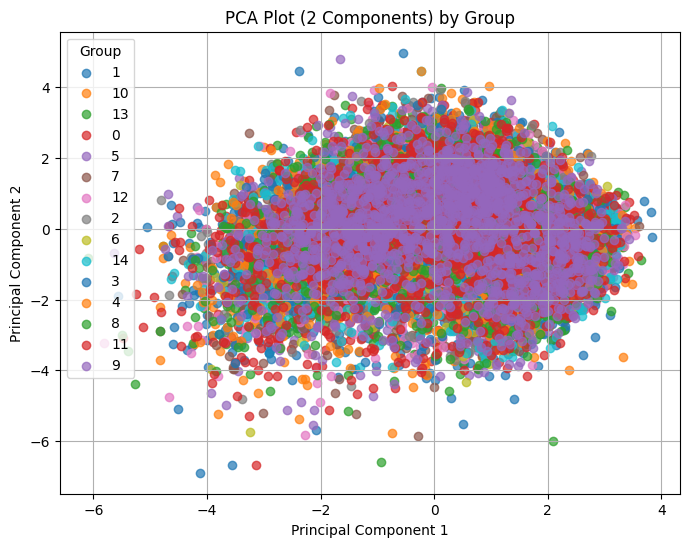

In [22]:
# Plotear los componentes principales, cada punto debe tener un color distinto dependiendo de su etiqueta

# Perform PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_train)

# Create a DataFrame with the PCA results
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

pca_df['Genre'] = data_train_genre

# Plot the PCA results
plt.figure(figsize=(8, 6))
for group in pca_df['Genre'].unique():
    group_data = pca_df[pca_df['Genre'] == group]
    plt.scatter(group_data['PC1'], group_data['PC2'], label=group, alpha=0.7)

plt.title('PCA Plot (2 Components) by Group')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Group')
plt.grid()
plt.show()




In [23]:
pca_components, explained_variance_ratio = optimal_pca_components(data_train)
print(f"Optimal number of PCA components: {pca_components}")
print(f"Explained variance ratio: {explained_variance_ratio}")

Optimal number of PCA components: 11
Explained variance ratio: [0.21327255 0.15739068 0.10733105 0.08362809 0.0791946  0.07627869
 0.06788434 0.0586441  0.05100392 0.03811609 0.03185515 0.01844994
 0.01695082]


In [24]:
errors = plot_reconstruction_error(data_train)
print(f"Reconstruction errors: {errors}")

Reconstruction errors: [np.float64(0.7412041219590003), np.float64(0.5929207196938092), np.float64(0.49180029380219087), np.float64(0.4130112774574292), np.float64(0.3383992075905608), np.float64(0.26653432447292275), np.float64(0.20257805864448802), np.float64(0.14732735413090436), np.float64(0.09927473573392441), np.float64(0.06336420197299054), np.float64(0.033352322837589814), np.float64(0.015969974377274623), np.float64(7.595043515078442e-31)]


In [25]:
# Perform PCA to retain 95% of the variance
pca_data, pca_model = perform_pca(data_train, explained_variance_threshold=0.95)

# View explained variance ratio
print("Explained Variance Ratio:", pca_model.explained_variance_ratio_)
print("Cumulative Variance:", np.cumsum(pca_model.explained_variance_ratio_))


Explained Variance Ratio: [0.21327255 0.15739068 0.10733105 0.08362809 0.0791946  0.07627869
 0.06788434 0.0586441  0.05100392 0.03811609 0.03185515]
Cumulative Variance: [0.21327255 0.37066324 0.47799428 0.56162237 0.64081697 0.71709565
 0.78497999 0.84362408 0.894628   0.93274409 0.96459924]


In [26]:
pca_data["Id"] = data_train_id
pca_data["genre"] = data_train_genre

In [27]:
plot_pca_3d(pca_data, 'genre')

## K-Means

In [28]:
lda_df = get_lda_df(pca_data, target_column="genre")

In [29]:
lda_with_clusters = apply_kmeans_to_lda(lda_df, n_clusters=15)

In [30]:
nmi_score = normalized_mutual_info_score(data_train_genre, lda_df['Cluster'])
print(f"Normalized Mutual Information Score: {nmi_score:.4f}")

Normalized Mutual Information Score: 0.8647


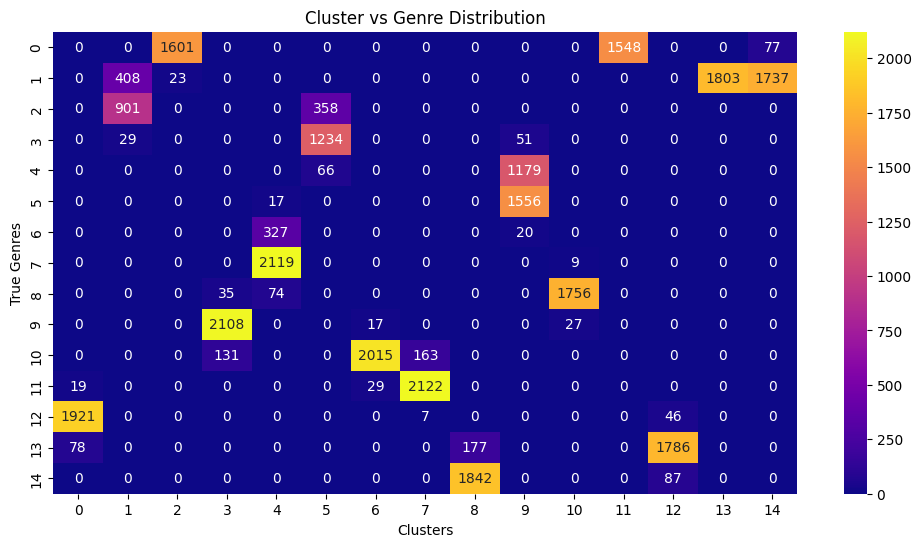

In [31]:
match_table = pd.crosstab(data_train_genre, lda_df['Cluster'])

plt.figure(figsize=(12, 6))
sns.heatmap(match_table, cmap="plasma", annot=True, fmt="d")
plt.xlabel("Clusters")
plt.ylabel("True Genres")
plt.title("Cluster vs Genre Distribution")
plt.show()
